0.240109735362 alpha
0.229996778005 alpha
0.221247142937 alpha
0.213550446648 alpha
0.205885157345 alpha
0.199597640092 alpha
0.193262428297 alpha
0.186820518207 alpha
0.182379683481 alpha
0.177852220889 alpha
0.174082838926 alpha
0.169926163517 alpha
0.167028721158 alpha
0.164683075849 alpha
0.162692622454 alpha
0.160161464408 alpha
0.157172543008 alpha
0.155608301934 alpha
0.153918589629 alpha
0.15223088371 alpha
0.150681303991 alpha
0.148340091153 alpha
0.14799051063 alpha
0.147807266142 alpha
0.1471713746 alpha
0.1469607066 alpha
0.14692374118 alpha
minimum alpha =  0.14692374118
ground state energy = -2.87719351999


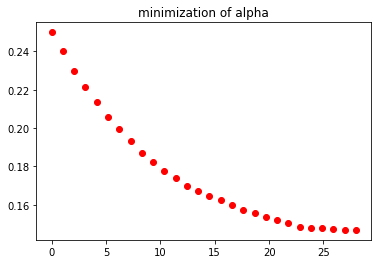

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def six_d_metropolis(alpha, N, n_walkers):
    rn = np.zeros((dim, N, n_walkers))
    r = np.random.randn(dim, n_walkers)
    
    for i in range(N):
        r_trial = r + (0.1*np.random.randn(dim, n_walkers))
        ratio = (trial_wave_function(alpha, r_trial) / trial_wave_function(alpha, r))**2
        eta = np.random.uniform(0,1,(dim,n_walkers))
        rn[:,i,:] = np.where(ratio >= 1, r_trial, (np.where(eta < ratio, r_trial, r)))
        r = np.where(ratio >= 1, r_trial, (np.where(eta < ratio, r_trial, r)))
    rn = rn[:,k:,:]

    return(rn)

def trial_wave_function(alpha, r):
    r1 = np.linalg.norm(r[:3,:], axis = 0)
    r2 = np.linalg.norm(r[3:,:], axis = 0)
    r12 = np.linalg.norm(r[:3,:]-r[3:,:], axis = 0)
    trial_wave = np.exp(-2*r1 - 2*r2 + r12/(2*(1+alpha*r12)))
    return(trial_wave)

def calc_Eloc(alpha, r):
    r1_unit = r[:3,:,:] / np.linalg.norm(r[:3,:,:], axis = 0)
    r2_unit = r[3:,:,:] / np.linalg.norm(r[3:,:,:], axis = 0)
    r12_unit = r1_unit - r2_unit
    r12 = np.linalg.norm(r[:3,:,:] - r[3:,:,:], axis = 0)
    E_loc = -4 + np.sum(r12_unit * (r[:3,:,:] - r[3:,:,:]), axis = 0) * 1/(r12*(1+alpha*r12)**2) - 1/(r12*(1+alpha*r12)**3) - 1/(4*(1+alpha*r12)**4) + 1/r12
    return(E_loc)

def der_ln_twf(alpha, r):
    r12 = np.linalg.norm(r[:3,:]-r[3:,:], axis = 0)
    d_ln_twf = r12**2/(-2*(1+alpha*r12))
    return(d_ln_twf)

def derivative_E(alpha):
    prob_dens = six_d_metropolis(alpha, 30000, 30)
    E = calc_Eloc(alpha, prob_dens)
    E_ground = np.mean(E)
    deriv_E = 2*(np.mean(E*der_ln_twf(alpha, prob_dens) - E_ground*np.mean(der_ln_twf(alpha, prob_dens))))
    return(deriv_E, E_ground)

def minimazation_alpha():
    gamma = 0.1
    tol = 0.0001
    max_it = 1000
    alpha_min = 0.25
    difference = 0.5
    i = 0
    E_ground = []
    alpha_array = []
    alpha_array.append(alpha_min)

    while abs(difference) >= tol and i < max_it:
        keep = alpha_min
        der_E, E_ground = derivative_E(alpha_min)
        alpha_min = alpha_min - gamma * der_E
        alpha_array.append(alpha_min)
        difference = alpha_min - keep
        print(alpha_min, 'alpha')
        i += 1

    print("minimum alpha = ", alpha_min)
    return(alpha_array, E_ground)

dim = 6
k = 4000
alpha, E_ground = minimazation_alpha()

print('ground state energy =', E_ground)

steps = np.linspace(0,len(alpha),len(alpha))

plt.title('minimization of alpha')
plt.plot(steps,alpha, 'ro')
plt.show()


In [12]:
print(alpha[-1])

0.143126354301
